In [1]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',as_frame=False)

In [2]:
X,y=mnist.data,mnist.target
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

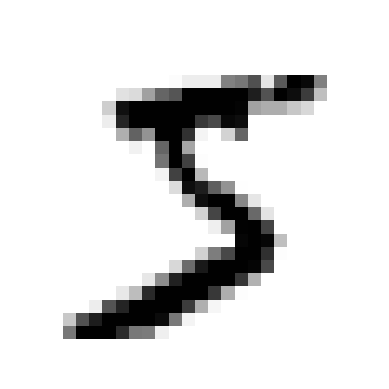

In [3]:
import matplotlib.pyplot as plt

def show_image(image_data):
    image=image_data.reshape(28,28)
    plt.imshow(image,cmap='binary')
    plt.axis('off')

random = X[0]
show_image(random)
plt.show()

In [4]:
y[0]

'5'

In [5]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

#the whole set is already shuffled hence we dont need to shuffle that using stratified shuffled split

# Gradient Descent : 
it is an iterative approach to find the best parameters for a particular model or algorithm. It is an optimization algorithm which is used to minimize the loss function, moves in the dirn where loss function decreases by calculating the derivative (-ve derivative means the weights are dcreasing the loss function which is desirable). 

and to move it uses the learning rate which can be seen as steps taken by this algorithm to move towards the -ve gradient if steps are too large then the algo might skip a lot of things and too small learning rate can make model take forever to find the best parameters.
                new_weight = old_weight - learning_rate * (gradient of loss)

**stoichastic GD:**
Instead of using the entire dataset each update, SGD:

- takes one random sample (or a small batch)
- computes gradient
- updates weights immediately
- it calculates the weights for one sample and then take another sample to do same thing again and it keeps getting updated unlike batch GD in which updation occurs after using whole batch of data to calcualte the weights, SDG takes samples and then computes one by one.

hence it is fast and reliable.



# training a binary classifier :

In [6]:
y_train_5=(y_train=='5')
y_test_5=(y_test=='5')
import numpy as np
print(np.unique(y_train_5))


[False  True]


In [7]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(random_state=42)
sgd.fit(X_train,y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [8]:
sgd.predict([random])

array([ True])

# PERFORMANCE MEASURES


In [9]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

# dummy classifier:
the most stupid model which predicts result either by random guessing, returning the most frequent class, always predict as fixed label, predicting on the basis of class frequencies,
*why do we even use this ???*
- just to see if our main model is actually good or just as good as this stupid model which randomly guesses the stuff and returns the prediciton hence we use it as a baseline model.
- in our case accuracy is too good to be true hence we will also see the results of a dummy classifier to predict 5 or not 5, in this case most feequent class is not 5 and accuracy is going to be high so let's see : 

In [10]:
from sklearn.dummy import DummyClassifier

dummy=DummyClassifier()
dummy.fit(X_train,y_train_5)
print(any(dummy.predict(X_train)))

False


In [11]:
cross_val_score(dummy,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

90% accuracy means that the dummmy classifier is really good which means something is off with the sgd classifer predictions  This is simply because only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time.

hence accuracy is not the right judgment parameter specially in skewed datasets.

A much better approach is confusion matrix

basic idea behind the confusion matrix is that for how many times the system has confused A as B out of all A/B pairs and for that we need the predicted and actual value set and we cant use test set to see that so we will use cross_val_predict() here.

In [12]:
from sklearn.model_selection import cross_val_predict
# instead of returning the evaluation scores, it returns the predictions made on each test fold.
y_train_pred=cross_val_predict(sgd,X_train,y_train_5,cv=3)

In [13]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_train_5,y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

# Preformance measure concepts:
- TP: the model has predicted the input as +ve and it is correct (True), the model has predicted correctly and didnt miss %
- FP: the model has predicted the input as +ve but it is incorrect (False), the model has classified/predicted incorrectly and missed "Not 5"
- TN: the model has predicted the input as -ve and it is correct (True), the model has predicted correctly 
- FN: the model has predicted the input as -ve and it is incorrect (False), the model has missed the actual +ves i.e. it predicted 5 as not 5.

- precision: how many of all marked as positive are actual +ves i.e. TP/FP+TP
- recall: out of all actual positives how much the model has predicted correctly i.e. TP/TP+FN , FN because the model has missed the actual +ves, hence total positives = not missed (TP) + missed (FN)

- precision recall trade-off:
 
A model uses confidence score to choose the predicted class, which shows how much the model is confident or sure of it's prediction, this confidence score can be set by the user (setting the threshold that the predictions with confdence score above 0.90 are accepted that is accept the prediction as true only is the model is 90% sure of it's prediction other wise mark it as false )

